## Step 1 - Load Dataset

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
df.shape

(732, 15)

There are 732 records and 15 features in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


## Step 2 - Clean the text

Now we are going to perform some operations on the "Text" feature which is important for sentiment analysis :-
   - Convert to lowercase
   - Remove URLs 
   - Remove emojis
   - Remove punctuation
   - Remove stopwords  



In [12]:
# Having overlook on first 20 values of "Text" feature
df['Text'].head(20)

0      Enjoying a beautiful day at the park!        ...
1      Traffic was terrible this morning.           ...
2      Just finished an amazing workout! 💪          ...
3      Excited about the upcoming weekend getaway!  ...
4      Trying out a new recipe for dinner tonight.  ...
5      Feeling grateful for the little things in lif...
6      Rainy days call for cozy blankets and hot coc...
7      The new movie release is a must-watch!       ...
8      Political discussions heating up on the timel...
9      Missing summer vibes and beach days.         ...
10     Just published a new blog post. Check it out!...
11     Feeling a bit under the weather today.       ...
12     Exploring the city's hidden gems.            ...
13     New year, new fitness goals! 💪               ...
14     Technology is changing the way we live.      ...
15     Reflecting on the past and looking ahead.    ...
16     Just adopted a cute furry friend! 🐾          ...
17     Late-night gaming session with friends.  

In [15]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = set(ENGLISH_STOP_WORDS)

In [16]:
# Function to clean the text

def clean_text(text):
    if not isinstance(text, str):
        return ""

    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # 3. Remove emojis
    text = re.sub(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags
        "]+",
        "",
        text,
    )

    # 4. Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # 5. Remove stopwords
    text = " ".join(word for word in text.split() if word not in stop_words)

    return text

In [17]:
df['clean_text'] = df['Text'].apply(clean_text)

In [18]:
df[['Text', 'clean_text']].head()

,Text,clean_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,just finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


Hence, we have successfully cleaned the **text** feature.

## Step 3 - Apply Sentiment model (VADER)

In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


True

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [22]:
# Apply VADER on cleaned text

df['sentiment_scores'] = df['clean_text'].apply(
    lambda x: sia.polarity_scores(x)
)

**VADER** returns 4 scores :-

- pos → positive

- neu → neutral

- neg → negative

- compound → overall sentiment (most important)

In [23]:
df['positive'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['neutral']  = df['sentiment_scores'].apply(lambda x: x['neu'])
df['negative'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

## Step 4 - Classify sentiment

In [24]:
def get_sentiment_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['compound'].apply(get_sentiment_label)

In [25]:
# Verifying results
df[['Text', 'clean_text', 'sentiment', 'compound']].head()

,Text,clean_text,sentiment,compound
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park,Positive,0.8074
1,Traffic was terrible this morning. ...,traffic terrible morning,Negative,-0.4767
2,Just finished an amazing workout! 💪 ...,just finished amazing workout,Positive,0.5859
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway,Positive,0.3400
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight,Neutral,0.0000


## Step 5 - Visualize Distribution

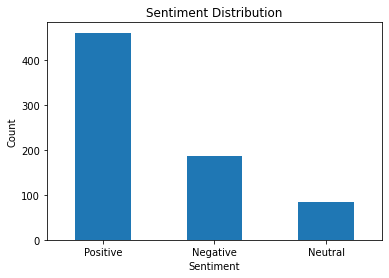

In [31]:
# Bar chart of sentiment distribution
df['sentiment'].value_counts().plot(
    kind='bar',
    figsize=(6,4),
    title='Sentiment Distribution',
)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Insights** :-

- Helps identify overall public opinion

- Quickly shows dominant sentiment class

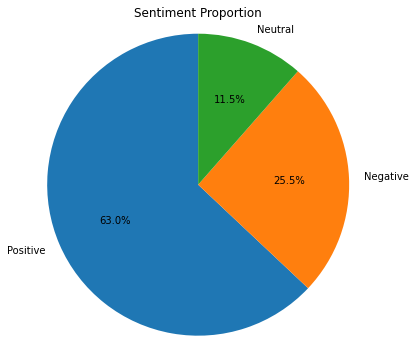

In [32]:
# Pie chart of sentiment proportion
df['sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    startangle=90
)

plt.title('Sentiment Proportion')
plt.ylabel('')
plt.axis('equal')
plt.show()

**Insights** :-

- Useful for high-level stakeholder view.
- Easy comparison of sentiment share.

## Step 6 - Generate Wordcloud

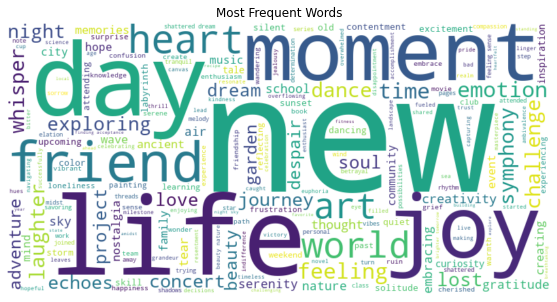

In [33]:
from wordcloud import WordCloud

text_data = " ".join(df['clean_text'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text_data)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words')
plt.show()

## Step 7 - Final Insights Summary


- Around **63%** of social media posts express **positive sentiment**, showing an overall optimistic tone.

- **Negative sentiment (~25%)** highlights specific issues rather than general dissatisfaction.

- **WordCloud** and **keyword analysis** reveal what users like and dislike.

- **Time-based analysis** enables **trend monitoring** and **event-driven sentiment tracking**.

- The project successfully demonstrates how **unstructured** text data can be transformed into actionable insights.